<a href="https://colab.research.google.com/github/minwooking/Data-Analysis-2021.11/blob/main/StatisticsVsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$v^T \cdot w = (v_1, v_2) \cdot \begin{bmatrix}w_{1}, w_{2}\end{bmatrix} = v_1 * w_1 + v_2 * w_2$


$\cfrac{\partial (v^T \cdot w)}{\partial w} = (\cfrac{\partial (v^T \cdot w)}{\partial w_1}, \cfrac{\partial (v^T \cdot w)}{\partial w_2}) = (v_1, v_2) = v$

In [ ]:
import numpy as np
X = np.arange(6).reshape((2,3)) # 먼저 X 를 지정해줍니다. 
X # X를 확인

array([[0, 1, 2],
       [3, 4, 5]])

$X^T$ : tranposed a. $X^T_{ij} = X_{ji}$
- 1 = X[0, 1] = $aX^T$[1, 0]
- 5 = X[1, 2] = $X^T$[2, 1]

In [ ]:
X.T # X.T를 했을때 X 의 모양  

array([[0, 3],
       [1, 4],
       [2, 5]])

In [ ]:
X[0,1] == X.T[1, 0]  # 

True

In [ ]:
X[0,2]

In [ ]:
w = np.random.randn(3)
b = 0.1
w, b

(array([-1.82273098,  0.79765859,  0.14399333]), 0.1)

In [ ]:
X.dot(w) + b

array([ 1.18564525, -1.45759191])

In [ ]:
X.dot(w) + b*np.array([[1,1]])

array([[ 1.18564525, -1.45759191]])

In [ ]:
X_ = np.hstack((np.array([1,1]).reshape((-1, 1)), X))
X_

array([[1, 0, 1, 2],
       [1, 3, 4, 5]])

In [ ]:
w_ = np.hstack((b, w))
w_

array([ 0.1       , -1.82273098,  0.79765859,  0.14399333])

In [ ]:
X_.shape, w_.shape

((2, 4), (4,))

In [ ]:
X_.dot(w_)

array([ 1.18564525, -1.45759191])

## 1. regression

Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- assume for 1 observative : x = (1, x), w = (b, w)

We know:  (here, y and X is constant about w)

$$\begin{align}
\cfrac {\partial}{\partial w} \left( v^T \cdot w \right) &= v \\
\cfrac {\partial}{\partial w} \left( w^T \cdot v \right) &= v \\
(w^T \cdot A)^T &= A^T \cdot w \\
\cfrac {\partial}{\partial w} \left( w^T \cdot A \cdot w \right) &= A \cdot w + A^T \cdot w
\end{align}$$

So, We solve: y.shape = (N, ), X.shape=(N, p+1), w.shape = (p+1, )

$$\begin{align}
y &= X \cdot w + \epsilon = \hat y + \epsilon\\
Loss(w) &= \epsilon ^2 =||y - \hat y||^2 = (y - X \cdot w)^T \cdot (y - X \cdot w)\\
&= (y^T - w^T \cdot X^T) \cdot (y - X \cdot w)\\
&= y^T \cdot y - w^T \cdot X^T \cdot y - y^T \cdot X \cdot w + w^T \cdot X^T \cdot X \cdot w\\
\cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y = 0 
\end{align}$$

We get $\hat w$ :
$$ {\cfrac {\partial Loss}{\partial w}} \Bigg|_{w = \hat w} = 0 \Rightarrow 
\hat w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

### 1.1 Using statistical tool
load_iris()는 bunch를 dict 형식의 python 객체를 리턴하는데, bunch는 dict와 유사해서 keys() 메소드로부터 key를 추출.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
bunch = load_iris()
bunch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
bunch.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
bunch.data.shape

(150, 4)

In [ ]:
iris = pd.DataFrame(bunch.data, columns=bunch.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


꽃받침의 길이와 너비, 꽃잎의 길이가 주어지면 꽃잎의 너비를 예측하는 회귀문제를 해결하려 한다면:
- 통계에서의 회귀 formula: y ~ X, y ~ x1 + x2 + x3

In [ ]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


petal width를 target으로 회귀식을 생성해보자.

In [ ]:
' + '.join(iris.columns[:3])

'sl + sw + pl'

In [ ]:
# formula = 'y ~ x1 + x2 + x3'
formula = '%s ~ '%iris.columns[3]
formula += ' + '.join(iris.columns[:3])
formula

'pw ~ sl + sw + pl'

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula = formula, data = iris)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pw   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           7.83e-88
Time:                        04:39:00   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2403      0.178     -1.347      0.180      -0.593       0.112
sl            -0.2073      0.048     -4.363      0.000      -0.301      -0.113
sw             0.2228      0.049      4.553      0.000       0.126       0.320
pl             0.5241      0.024     21.399      0.000       0.476       0.572
==============================================================================
Omnibus:                        5.609   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.811
Skew:                           0.223   Prob(JB):                       0.0332
Kurtosis:                       3.944   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result.params

Intercept   -0.240307
sl          -0.207266
sw           0.222829
pl           0.524083
dtype: float64

### 1.2 Using numpy with linear algebra
Now, we'll compute with numpy :
$$ \hat w =  (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- assume: x = (1, x), w = (b, w). So,
- y = X[:, 3]
- X = np.hstack(np.ones(shape), X[:, :3])

And then, you can use numpy.linalg.inv for inverse matrix.

In [ ]:
iris.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = bunch.data[:, 3]
X = bunch.data[:, :3]

$$ \hat w =  (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [ ]:
X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))
X

array([[1. , 5.1, 3.5, 1.4],
       [1. , 4.9, 3. , 1.4],
       [1. , 4.7, 3.2, 1.3],
       [1. , 4.6, 3.1, 1.5],
       [1. , 5. , 3.6, 1.4],
       [1. , 5.4, 3.9, 1.7],
       [1. , 4.6, 3.4, 1.4],
       [1. , 5. , 3.4, 1.5],
       [1. , 4.4, 2.9, 1.4],
       [1. , 4.9, 3.1, 1.5],
       [1. , 5.4, 3.7, 1.5],
       [1. , 4.8, 3.4, 1.6],
       [1. , 4.8, 3. , 1.4],
       [1. , 4.3, 3. , 1.1],
       [1. , 5.8, 4. , 1.2],
       [1. , 5.7, 4.4, 1.5],
       [1. , 5.4, 3.9, 1.3],
       [1. , 5.1, 3.5, 1.4],
       [1. , 5.7, 3.8, 1.7],
       [1. , 5.1, 3.8, 1.5],
       [1. , 5.4, 3.4, 1.7],
       [1. , 5.1, 3.7, 1.5],
       [1. , 4.6, 3.6, 1. ],
       [1. , 5.1, 3.3, 1.7],
       [1. , 4.8, 3.4, 1.9],
       [1. , 5. , 3. , 1.6],
       [1. , 5. , 3.4, 1.6],
       [1. , 5.2, 3.5, 1.5],
       [1. , 5.2, 3.4, 1.4],
       [1. , 4.7, 3.2, 1.6],
       [1. , 4.8, 3.1, 1.6],
       [1. , 5.4, 3.4, 1.5],
       [1. , 5.2, 4.1, 1.5],
       [1. , 5.5, 4.2, 1.4],
       [1. , 4

In [ ]:
from scipy.linalg import inv
w = inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

In [ ]:
result.params

Intercept   -0.240307
sl          -0.207266
sw           0.222829
pl           0.524083
dtype: float64

### 1.3 Machine Learning Method

In [ ]:
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 ])

1. 전체 학습데이터의 일부분(batch)을 이용하여 예측을 수행하고
2. 실제 값에서 예측값을 빼서 error구해 손실을 계산하고
3. 손실을 줄이는 방향으로 학습 파라미터(w)를 업데이트하고
4. 1 ~ 3을 전체 학습데이터를 모두 이용할 때까지 반복한 후,
5. 학습데이터를 다시 섞고 1 ~ 4의 과정을 EPOCH의 수만큼 반복한다.

$$\begin{align}
Loss(w) &= \epsilon^2 = (y - X \cdot w)^T \cdot (y - X \cdot w)\\
dW = \cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y \\
w(t+1) &= w(t) - \text{lr} * \cfrac {\partial Loss}{\partial w} \Bigg|_{w =w(t)}
\end{align}$$

In [ ]:
EPOCH = 50000
batch = 32
lr = 0.0001
rows = X.shape[0]
losses = []
randRow = np.arange(rows)

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        y_hat = x_batch.dot(w)
        loss += (y_batch - y_hat).T.dot((y_batch - y_hat))
        # dw = d Loss(w) / d(w)
        dw = x_batch.T.dot(x_batch).dot(w) - x_batch.T.dot(y_batch) 
        w -= lr*dw
        
    loss /= rows
    losses.append(loss)

In [ ]:
w

array([-0.24080432, -0.20653305,  0.22333685,  0.52462474])

In [ ]:
result.params.values

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

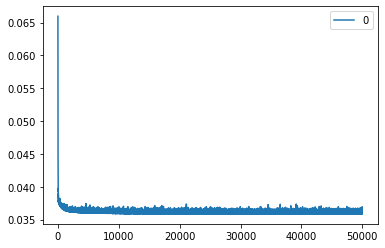

In [ ]:
import pandas as pd
%matplotlib inline
loss_df = pd.DataFrame(losses)
loss_df.plot()

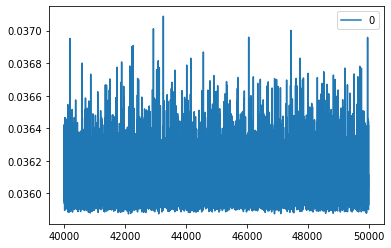

In [ ]:
loss_df[40000:].plot()

### 1.4 sklearn 활용 방법

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                   data.target,
                                                   random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X_train[:5], y_train[:5]

(array([[9.10300e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
         7.15500e+00, 9.22000e+01, 2.70060e+00, 3.00000e+00, 1.93000e+02,
         1.78000e+01, 3.94120e+02, 4.82000e+00],
        [3.53501e+00, 0.00000e+00, 1.95800e+01, 1.00000e+00, 8.71000e-01,
         6.15200e+00, 8.26000e+01, 1.74550e+00, 5.00000e+00, 4.03000e+02,
         1.47000e+01, 8.80100e+01, 1.50200e+01],
        [3.57800e-02, 2.00000e+01, 3.33000e+00, 0.00000e+00, 4.42900e-01,
         7.82000e+00, 6.45000e+01, 4.69470e+00, 5.00000e+00, 2.16000e+02,
         1.49000e+01, 3.87310e+02, 3.76000e+00],
        [3.87350e-01, 0.00000e+00, 2.56500e+01, 0.00000e+00, 5.81000e-01,
         5.61300e+00, 9.56000e+01, 1.75720e+00, 2.00000e+00, 1.88000e+02,
         1.91000e+01, 3.59290e+02, 2.72600e+01],
        [6.72400e-02, 0.00000e+00, 3.24000e+00, 0.00000e+00, 4.60000e-01,
         6.33300e+00, 1.72000e+01, 5.21460e+00, 4.00000e+00, 4.30000e+02,
         1.69000e+01, 3.75210e+02, 7.34000e+00]]),
 array([37.9,

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
scoreTrn = model.score(X_train, y_train)
scoreTst = model.score(X_test, y_test)
print(f"학습 결정계수 : {scoreTrn}")
print(f"테스트 결정계수 : {scoreTst}")

학습 결정계수 : 0.748087259862344
테스트 결정계수 : 0.6844267283527068


In [ ]:
np.sqrt(scoreTst)

0.8273008693049384

In [ ]:
coefficient = model.coef_
intercept = model.intercept_

print(f"회귀 계수: \n {coefficient}\n")
print(f" y 절편 : \n {intercept}\n")

회귀 계수: 
 [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]

 y 절편 : 
 29.836420163838596



결정계수 $R^2 = 1 - \cfrac {SSE}{SST} = \cfrac {\sum_i (y - \hat y)^2}{\sum_j (y - \bar y)^2}$

In [ ]:
predTrn = model.predict(X_train)
predTst = model.predict(X_test)

In [ ]:
SST_trn = np.square(y_train - y_train.mean()).sum()
SST_tst = np.square(y_test - y_test.mean()).sum()
SSE_trn = np.square(y_train - predTrn).sum()
SSE_tst = np.square(y_test - predTst).sum()
R2_trn = 1 - SSE_trn/SST_trn
R2_tst = 1 - SSE_tst/SST_tst
print(R2_trn, R2_tst)

0.748087259862344 0.6844267283527068


학습데이터에 대해서는 SSR = SST - SSE가 성립하지만, 테스트데이터에 대해서는 성립하지 않는다.

In [ ]:
SSR_trn = np.square(predTrn - y_train.mean()).sum()
SSR_tst = np.square(predTst - y_test.mean()).sum()
print(SSR_trn)
print(SSR_tst)

25143.494274272445
8234.765875083527


In [ ]:
print(SST_trn - SSE_trn)
print(SST_tst - SSE_tst)

25143.49427427221
6086.913001052986



---
[Quiz] 위에서 구현한 numpy 코드를 이용하여 머신러닝 기법으로 보스턴 집값 데이터에 대한 회귀모델을 작성해보자.

이를 위해서는 아래와 같은 작업이 필요하다.
Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- rewriting: X = (1, X), w = (b, w)


In [ ]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                   data.target,
                                                   random_state=42)

Xtr = np.hstack((np.ones(X_train.shape[0]).reshape((-1,1)), X_train))
Xts = np.hstack((np.ones(X_test.shape[0]).reshape((-1,1)), X_test))

np.random.seed(234)
w = np.random.rand(Xtr.shape[1]) - .5
w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022,
        0.19880741,  0.36642932,  0.13952185, -0.04315635, -0.00120525,
        0.22047501, -0.22874681,  0.30061903,  0.00925268])

In [ ]:
Xtr[:5]

array([[1.00000e+00, 9.10300e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00,
        4.88000e-01, 7.15500e+00, 9.22000e+01, 2.70060e+00, 3.00000e+00,
        1.93000e+02, 1.78000e+01, 3.94120e+02, 4.82000e+00],
       [1.00000e+00, 3.53501e+00, 0.00000e+00, 1.95800e+01, 1.00000e+00,
        8.71000e-01, 6.15200e+00, 8.26000e+01, 1.74550e+00, 5.00000e+00,
        4.03000e+02, 1.47000e+01, 8.80100e+01, 1.50200e+01],
       [1.00000e+00, 3.57800e-02, 2.00000e+01, 3.33000e+00, 0.00000e+00,
        4.42900e-01, 7.82000e+00, 6.45000e+01, 4.69470e+00, 5.00000e+00,
        2.16000e+02, 1.49000e+01, 3.87310e+02, 3.76000e+00],
       [1.00000e+00, 3.87350e-01, 0.00000e+00, 2.56500e+01, 0.00000e+00,
        5.81000e-01, 5.61300e+00, 9.56000e+01, 1.75720e+00, 2.00000e+00,
        1.88000e+02, 1.91000e+01, 3.59290e+02, 2.72600e+01],
       [1.00000e+00, 6.72400e-02, 0.00000e+00, 3.24000e+00, 0.00000e+00,
        4.60000e-01, 6.33300e+00, 1.72000e+01, 5.21460e+00, 4.00000e+00,
        4.30000e+02, 1.690

In [ ]:
X_train[:5]

array([[9.10300e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.15500e+00, 9.22000e+01, 2.70060e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.94120e+02, 4.82000e+00],
       [3.53501e+00, 0.00000e+00, 1.95800e+01, 1.00000e+00, 8.71000e-01,
        6.15200e+00, 8.26000e+01, 1.74550e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 8.80100e+01, 1.50200e+01],
       [3.57800e-02, 2.00000e+01, 3.33000e+00, 0.00000e+00, 4.42900e-01,
        7.82000e+00, 6.45000e+01, 4.69470e+00, 5.00000e+00, 2.16000e+02,
        1.49000e+01, 3.87310e+02, 3.76000e+00],
       [3.87350e-01, 0.00000e+00, 2.56500e+01, 0.00000e+00, 5.81000e-01,
        5.61300e+00, 9.56000e+01, 1.75720e+00, 2.00000e+00, 1.88000e+02,
        1.91000e+01, 3.59290e+02, 2.72600e+01],
       [6.72400e-02, 0.00000e+00, 3.24000e+00, 0.00000e+00, 4.60000e-01,
        6.33300e+00, 1.72000e+01, 5.21460e+00, 4.00000e+00, 4.30000e+02,
        1.69000e+01, 3.75210e+02, 7.34000e+00]])

In [ ]:
Xtr.shape

(379, 14)

In [ ]:
X_train.shape

(379, 13)

In [ ]:
np.random.seed(234)
w = np.random.rand(Xtr.shape[1]) - .5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022,
        0.19880741,  0.36642932,  0.13952185, -0.04315635, -0.00120525,
        0.22047501, -0.22874681,  0.30061903,  0.00925268])

In [ ]:
EPOCH = 10
batch = 32
lr = 0.0001
rows = Xtr.shape[0]
losses = []
randRow = np.arange(rows)

for epoch in range(EPOCH):
    shuffle(randRow)
    loss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = Xtr[batch_index]
        y_batch = y_train[batch_index]
        y_hat = x_batch.dot(w)
        loss += (y_batch - y_hat).T.dot((y_batch - y_hat))
        # dw = d Loss(w) / d(w)
        dw = x_batch.T.dot(x_batch).dot(w) - x_batch.T.dot(y_batch)
        w -= lr*dw
        print(w)
        
    loss /= rows
    losses.append(loss)

[-1.09071503e+00 -4.13091126e+00 -5.15501719e+00 -7.24276276e+00
 -2.96044006e-01 -1.66916077e-01 -3.50111540e+00 -4.38141754e+01
 -2.07574196e+00 -7.44766949e+00 -2.85607532e+02 -1.15976230e+01
 -2.21724428e+02 -8.61261996e+00]
[6.22393385e+02 3.51754747e+03 6.36820202e+03 6.69148468e+03
 4.77947570e+01 3.36561004e+02 3.94281555e+03 3.85111963e+04
 2.59080569e+03 6.06542564e+03 2.55905583e+05 1.15293862e+04
 2.32585553e+05 8.30982821e+03]
[-5.98223884e+05 -2.37812498e+06 -4.77809119e+06 -7.27709866e+06
 -6.41979961e+04 -3.38280106e+05 -3.69425098e+06 -4.29052391e+07
 -2.19753900e+06 -5.29312277e+06 -2.44753833e+08 -1.15065310e+07
 -2.15748031e+08 -7.86673604e+06]
[5.91052876e+08 4.44708897e+09 3.71513278e+09 7.74194756e+09
 5.81088822e+07 3.57203926e+08 3.66717159e+09 4.52800954e+10
 1.82765209e+09 6.71254989e+09 2.71423311e+11 1.08866144e+10
 2.12379200e+11 8.30197236e+09]
[-5.85820673e+11 -1.82673981e+12 -1.20271773e+13 -6.20876656e+12
 -4.35051730e+10 -3.20872828e+11 -3.82891196e+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


In [ ]:
print(f"회귀 계수: \n {coefficient}\n")
print(f" y 절편 : \n {intercept}\n")

회귀 계수: 
 [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]

 y 절편 : 
 29.836420163838596



In [ ]:
w

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

In [ ]:
np.random.seed(123)
w = np.random.rand(Xtr.shape[1]) - .5
w

array([ 0.19646919, -0.21386067, -0.27314855,  0.05131477,  0.21946897,
       -0.07689354,  0.4807642 ,  0.18482974, -0.0190681 , -0.10788248,
       -0.15682198,  0.22904971, -0.06142776, -0.4403221 ])

In [ ]:
EPOCH = 50
batch = 32
lr = 0.00000001
rows = Xtr.shape[0]
losses = []
randRow = np.arange(rows)
alpha = .01

for epoch in range(EPOCH):
    shuffle(randRow)
    loss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = Xtr[batch_index]
        y_batch = y_train[batch_index]
        y_hat = x_batch.dot(w)
        loss += (y_batch - y_hat).T.dot((y_batch - y_hat)) + alpha*.5*w.T.dot(w)
        # dw = d Loss(w) / d(w)
        dw = x_batch.T.dot(x_batch).dot(w) - x_batch.T.dot(y_batch) + alpha*w
        w -= lr*dw
        
    loss /= rows
    print(loss)
    print(w)
    losses.append(loss)

4242.729804815162
[ 0.19669466 -0.21289219 -0.27011701  0.05389239  0.2194876  -0.07676665
  0.48219366  0.20018283 -0.01822325 -0.10543911 -0.05866731  0.23318649
  0.01884521 -0.43750207]
498.44989173685894
[ 0.19675986 -0.21259539 -0.26861957  0.05454604  0.21949299 -0.07673153
  0.48261885  0.20403979 -0.01794397 -0.10472744 -0.03041706  0.23435033
  0.04172438 -0.43679026]
189.29129433926732
[ 0.19677955 -0.21251234 -0.26760451  0.05464939  0.21949495 -0.07672242
  0.48275879  0.2046457  -0.01782879 -0.10451756 -0.0222807   0.23467244
  0.04811814 -0.43668425]
163.3636558993418
[ 0.19678663 -0.21248696 -0.26672169  0.05460121  0.21949596 -0.07672058
  0.48281907  0.20434383 -0.01775793 -0.10444753 -0.01967298  0.23476295
  0.05001956 -0.43674243]
160.72049093841144
[ 0.19678957 -0.21248239 -0.26588243  0.05450247  0.21949668 -0.07672114
  0.48285334  0.20374457 -0.01770164 -0.10442517 -0.0189179   0.23477623
  0.05043935 -0.43685682]
160.16073192027199
[ 0.19679168 -0.21248084 -0.

In [ ]:
losses

[4242.729804815162,
 498.44989173685894,
 189.29129433926732,
 163.3636558993418,
 160.72049093841144,
 160.16073192027199,
 159.24562218222272,
 158.58036319091403,
 157.88733705770576,
 157.35338590645148,
 156.88149191942705,
 156.16961918739824,
 155.79622242383965,
 155.0869766257454,
 154.40551403283936,
 153.703065108019,
 153.27981233088798,
 152.9851561440808,
 151.97077331974802,
 151.6264754463242,
 150.74566409486033,
 150.18377967388517,
 149.85913027015198,
 149.12998487009477,
 148.85642476982147,
 148.0700327684791,
 147.24067338880627,
 146.57211106862405,
 146.0584097040675,
 145.7840624255344,
 145.28964394815762,
 144.59165599376442,
 144.04784029826476,
 143.34759251773437,
 142.75679939503155,
 142.59015861899795,
 141.9093348132392,
 141.22228348313456,
 141.17731180559903,
 140.18990714287747,
 139.73866993353525,
 139.16643339559087,
 138.65352494341914,
 138.06761449185228,
 137.6366572735179,
 137.26140654344147,
 136.66035848419205,
 136.2463413339559,
 135.

In [ ]:
w

array([ 0.1968646 , -0.21256339, -0.23081864,  0.0495946 ,  0.21952702,
       -0.07677379,  0.48402304,  0.17487182, -0.01550984, -0.10419697,
       -0.01381074,  0.23434474,  0.04964785, -0.44252709])

In [ ]:
print(f"회귀 계수: \n {coefficient}\n")
print(f" y 절편 : \n {intercept}\n")

회귀 계수: 
 [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]

 y 절편 : 
 29.836420163838596



In [ ]:
predTrn = Xtr.dot(w)
predTst = Xts.dot(w)

In [ ]:
SST_trn = np.square(y_train - y_train.mean()).sum()
SST_tst = np.square(y_test - y_test.mean()).sum()
SSE_trn = np.square(y_train - predTrn).sum()
SSE_tst = np.square(y_test - predTst).sum()
R2_trn = 1 - SSE_trn/SST_trn
R2_tst = 1 - SSE_tst/SST_tst
print(R2_trn, R2_tst)

-0.5188437301521689 -1.095012289658695


## 2. classification
We consider binary classification, and want to predict not directly <font color='red'>y</font> but <font color='blue'>p(y=1)</font>.

We Set:

$$\begin{align}
\hat y &= P(y=1) = \sigma(X \cdot w) \\
\sigma(z) &= \cfrac 1 {1+\exp(-z)}\\
\cfrac {\partial \sigma(z)}{\partial z} &= \cfrac {\exp(-z)} {(1+\exp(-z))^2} = \sigma(z)(1-\sigma(z))\\
Loss(w) &= NLL(w) 
= - \left[ y^T \cdot \log P(y=1) \right] - \left[ (1-y)^T \cdot \log (1-P(y=1)) \right] \\
\cfrac {\partial Loss}{\partial w} &= - X^T \cdot \left[ y \cdot (1 - P(y=1)) \right] + X^T \cdot \left[(1-y) \cdot P(y=1) \right] \\
&= X^T \cdot (\hat y - y)
\end{align}$$

We update w with :
$$w(t+1) = w(t) - lr * \cfrac {\partial Loss}{\partial w} \Bigg|_{w =w(t)}$$

likelyhood(y) = $P(y=1)^y * (1-P(y=1))^{1-y}$
- P(y = 0) + P(y = 1) = 1
- P(y = 0) = 1 - P(y = 1)

---
n 개의 데이터 전체에 걸친 우도값:
$$\begin{align}
Likelyhood(Y) &= \prod_{i=1}^n {P(y_i=1)^{y_i} * (1-P(y_i=1))^{1-y_i}}\\
\log{Likelyhood(Y)} = LL(Y) &= \sum_{i=1}^n \left[ {y_i \log(P(y_i=1)) + (1-y_i) \log((1-P(y_i=1))} \right] \\
Loss(Y) = NLL(Y) &= - \sum_{i=1}^n \left[ {y_i \log(P(y_i=1)) + (1-y_i)\log((1-P(y_i=1))} \right] 
\end{align}$$

---
하나의 데이터에 대해 y와 P(y=1)로 계산한 loss 함수

In [ ]:
import numpy as np
def loss(y, py1):
    return -y*np.log(py1) - (1-y)*np.log(1-py1)

[Quiz] y = 1일때, P(y=1)이 0.01 ~ 0.99까지 0.01씩 변할 때, loss의 값을 계산하여 p, loss로 그래프를 그려라.

In [ ]:
py1 = np.arange(1, 100)*.01
py1

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [ ]:
Loss = loss(1, py1)
Loss

array([4.60517019, 3.91202301, 3.5065579 , 3.21887582, 2.99573227,
       2.81341072, 2.65926004, 2.52572864, 2.40794561, 2.30258509,
       2.20727491, 2.12026354, 2.04022083, 1.96611286, 1.89711998,
       1.83258146, 1.77195684, 1.71479843, 1.66073121, 1.60943791,
       1.56064775, 1.51412773, 1.46967597, 1.42711636, 1.38629436,
       1.34707365, 1.30933332, 1.27296568, 1.23787436, 1.2039728 ,
       1.17118298, 1.13943428, 1.10866262, 1.07880966, 1.04982212,
       1.02165125, 0.99425227, 0.96758403, 0.94160854, 0.91629073,
       0.89159812, 0.86750057, 0.84397007, 0.82098055, 0.7985077 ,
       0.77652879, 0.75502258, 0.73396918, 0.71334989, 0.69314718,
       0.67334455, 0.65392647, 0.63487827, 0.61618614, 0.597837  ,
       0.5798185 , 0.56211892, 0.54472718, 0.52763274, 0.51082562,
       0.49429632, 0.4780358 , 0.46203546, 0.4462871 , 0.43078292,
       0.41551544, 0.40047757, 0.38566248, 0.37106368, 0.35667494,
       0.34249031, 0.32850407, 0.31471074, 0.30110509, 0.28768

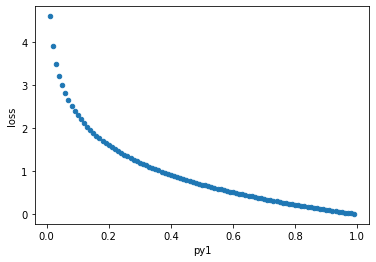

In [ ]:
import pandas as pd
lossDf = pd.DataFrame({'py1':py1, 'loss':Loss})
lossDf.plot.scatter('py1', 'loss')

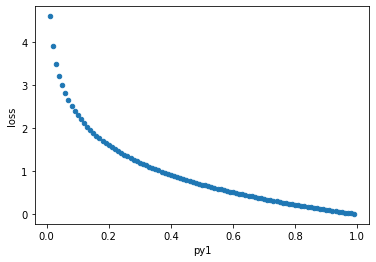

In [ ]:
lossDf.plot('py1', 'loss', kind='scatter')

In [ ]:
lossDf.head()

,py1,loss
0,0.01,4.605170
1,0.02,3.912023
2,0.03,3.506558
3,0.04,3.218876
4,0.05,2.995732


[Quiz] z = np.linspace(-10, 10, 1000)일 때:
- sigmoid(z)을 정의하고
- z, sigmoid(z)에 대해 그래프를 그려라

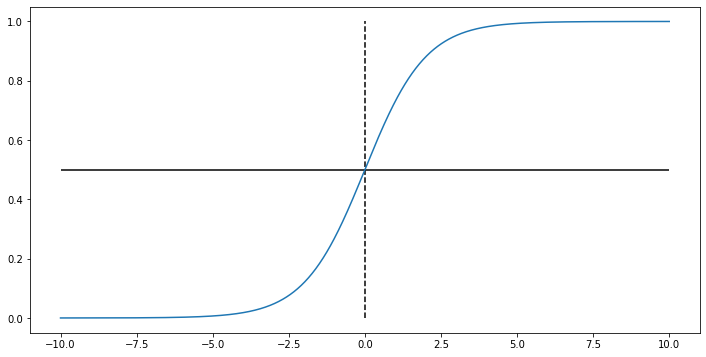

In [ ]:
z = np.linspace(-10, 10, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(z, sigmoid(z))
ax.hlines(0.5, -10, 10, 'k', '-')
ax.vlines(0, 0, 1, 'k', '--')

[Quiz] 10000개의 P(y=1)가 있다. 10000개의 y값이 있다.
- 이때, seed를 123 고정해서 p, y을 생성하고
- likelihood와 log likelihood를 계산해보고, 이를 비교해보자.

$$\begin{align}
Likelyhood(Y) &= \prod_{i=1}^n {P(y_i=1)^{y_i} * (1-P(y_i=1))^{1-y_i}}\\
\log{Likelyhood(Y)} = LL(Y) &= \sum_{i=1}^n \left[ {y_i \log(P(y_i=1)) + (1-y_i) \log((1-P(y_i=1))} \right] \\
Loss(Y) = NLL(Y) &= - \sum_{i=1}^n \left[ {y_i \log(P(y_i=1)) + (1-y_i)\log((1-P(y_i=1))} \right] 
\end{align}$$

In [ ]:
np.random.seed(123)
py1 = np.random.random(10000)
randy = np.random.randint(0, 2, 10000)
goody = np.where(py1 + np.random.random(10000)*.2 > .5, 1, 0)

In [ ]:
Lrandy = np.cumprod(py1**randy * (1 - py1)**(1-randy))[-1]
LLrandy = np.sum(randy*np.log(py1) + (1-randy)*np.log(1-py1))
Lossrandy = - LLrandy
Lrandy, LLrandy, Lossrandy

(0.0, -10099.305164935557, 10099.305164935557)

In [ ]:
Lgoody = np.cumprod(py1**goody * (1 - py1)**(1-goody))[-1]
LLgoody = np.sum(goody*np.log(py1) + (1-goody)*np.log(1-py1))
Lossgoody = - LLgoody
Lgoody, LLgoody, Lossgoody

(0.0, -3330.566343448386, 3330.566343448386)

In [ ]:
Lrandy = 1
for p, y in zip(py1, randy):
    Lrandy *= p**y * (1-p)**(1-y)
Lrandy

0.0

In [ ]:
a = np.array([2, 3, 5])
a

array([2, 3, 5])

In [ ]:
np.cumprod(a)

array([ 2,  6, 30])

### 2.1 statistical tool
binary case만을 고려하기 위해, 인위적인 분류문제를 생성하자.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)
print(X.shape)
X[:5]

(100, 4)


array([[-0.31629979,  0.70803893, -2.29291305,  0.28220666],
       [-0.67690095, -0.77936232, -1.12511459, -0.85295128],
       [ 2.70496343,  1.81256131,  0.09005406,  0.62008331],
       [ 0.5868326 ,  0.36681905, -0.45731792, -0.46723319],
       [ 0.65746416, -1.15725619, -0.03396529, -0.40039299]])

In [ ]:
y.shape

(100,)

In [ ]:
y[:5]

array([1, 0, 1, 1, 0])

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
print(X.shape)
X[:5]

(100, 5)


array([[ 1.        , -0.31629979,  0.70803893, -2.29291305,  0.28220666],
       [ 1.        , -0.67690095, -0.77936232, -1.12511459, -0.85295128],
       [ 1.        ,  2.70496343,  1.81256131,  0.09005406,  0.62008331],
       [ 1.        ,  0.5868326 ,  0.36681905, -0.45731792, -0.46723319],
       [ 1.        ,  0.65746416, -1.15725619, -0.03396529, -0.40039299]])

통계 formla는 y ~ X 형식으로 나타나기 때문에, sklearn과 달리 X보다 y를 먼서 써준다.

In [ ]:
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.124262
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:                  0.8207
Time:                        04:39:26   Log-Likelihood:                -12.426
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 1.161e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3037      0.603      0.503      0.615      -0.879       1.486
x1            -1.0410      0.731     -1.423      0.155      -2.474       0.392
x2             5.6889      1.538      3.700      0.000       2.675       8.703
x3            -0.2788      0.553     -0.504      0.614      -1.363       0.805
x4            -0.8798      0.659     -1.336      0.182      -2.171       0.411
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

P(y=1)과 y의 값을 비교해서 보자.

In [ ]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Prob(y=1) = Sigmoid(X.W)
prob = sigmoid(X.dot(result.params))
np.hstack((y.reshape(-1, 1), prob.reshape(-1, 1)))[:10]

array([[1.        , 0.9936437 ],
       [0.        , 0.08617143],
       [1.        , 0.99927514],
       [1.        , 0.91037393],
       [0.        , 0.00135507],
       [1.        , 0.99995576],
       [0.        , 0.00141865],
       [1.        , 0.99893419],
       [0.        , 0.0844124 ],
       [1.        , 0.96469283]])

[Quiz] 이 모델의 정확도를 구하라.

In [ ]:
preds = np.where(result.predict(X) > 0.5, 1, 0)

In [ ]:
(preds == y).mean()

0.97

[Quiz] 정확하지 않은 데이터의 색인은 무엇이고, 이때의 데이터는 어떤 값인가?

In [ ]:
falseIdx = np.where(preds != y)[0]
falseIdx

array([56, 61, 79])

In [ ]:
X[falseIdx]

array([[ 1.        , -0.40668098, -0.40132266, -0.42305624, -0.25653788],
       [ 1.        ,  0.77399926, -0.08399356, -0.75187076, -0.11374508],
       [ 1.        ,  0.32793911,  1.1056454 , -0.27680916,  1.13384332]])

In [ ]:
(y[falseIdx], prob[falseIdx])

(array([1, 1, 0]), array([0.22927002, 0.33846185, 0.99518809]))

### 2.2 Using numpy with linear algebra
can't get exact solution, but approximation method with Hessian Matrix

### 2.3 Machine Learning Method
#### 1) SGD(확률적 경사하강법)

1. 전체 학습데이터의 일부분(batch)을 이용하여 예측을 수행하고
2. 예측결과를 실제 값과 구분하여 손실을 계산하고
3. 손실을 줄이는 방향으로 학습 파라미터(w)를 업데이트하고
4. 1 ~ 3을 전체 학습데이터를 모두 이용할 때까지 반복한 후,
5. 학습데이터를 다시 섞고 1 ~ 4의 과정을 EPOCH의 수만큼 반복한다.

In [ ]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [ ]:
EPOCH = 150000 # 50000
batch = 34 # 2^n이 좋으나 데이터가 100개라 1/3로 함
lrs = [0.0005, 0.00005, 0.00001] # stepwise learning rate
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
MIN = 10**(-8)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    if epoch < 50000:
        lr = lrs[0]
    elif epoch < 100000:
        lr = lrs[1]
    else: lr = lrs[2]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        # 아래는 직접 구현해보세요.
        # zero devide error를 막기 위해 작은 MIN 값을 log에 넣어준다.
        yhat = sigmoid(x_batch.dot(w))
        loss += - y_batch.T.dot(np.log(yhat + MIN)) \
                - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        w -= lr*x_batch.T.dot(yhat - y_batch)
        
    loss /= rows
    losses.append(loss)

$$\begin{align}
\hat y &= P(y=1) = \sigma(X \cdot w) \\
Loss(w) &= NLL(w) 
= - \left[ y^T \cdot \log P(y=1) \right] - \left[ (1-y)^T \cdot \log (1-P(y=1)) \right] \\
\cfrac {\partial Loss}{\partial w} &= X^T \cdot (\hat y - y) = dw \\
w &= w - lr * dw
\end{align}$$

In [ ]:
w

array([ 0.30365817, -1.04094798,  5.68892956, -0.27881875, -0.87982798])

In [ ]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

In [ ]:
import pandas as pd
loss_df = pd.DataFrame(losses, columns=['loss'])

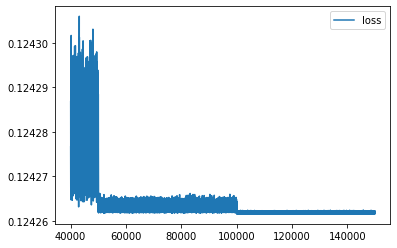

In [ ]:
loss_df[40000:].plot()

[Quiz] 정확도를 계산하세요.

In [ ]:
(np.where(sigmoid(X.dot(w)) > .5, 1, 0) == y).mean()

0.97

[Quiz] epoch는 그대로 유지하고, 
- lrs = [0.0005, 0.00005, 0.00001, 0.000005]를 
- epoch가 30000, 60000, 90000 일때 각각 적용해서 
- loss가 이전과 달리 어떻게 변화하는 지 그래프로 그려보자.

In [ ]:
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [ ]:
EPOCH = 150000 # 50000
batch = 34 # 2^n이 좋으나 데이터가 100개라 1/3로 함
lrs = [0.0005, 0.00005, 0.00001, 0.000005] # stepwise learning rate
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
MIN = 10**(-8)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    if epoch < 30000: lr = lrs[0]
    elif epoch < 60000: lr = lrs[1]
    elif epoch < 90000: lr = lrs[2]
    else: lr = lrs[3]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        # 아래는 직접 구현해보세요.
        # zero devide error를 막기 위해 작은 MIN 값을 log에 넣어준다.
        yhat = sigmoid(x_batch.dot(w))
        loss += - y_batch.T.dot(np.log(yhat + MIN)) \
                - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        w -= lr*x_batch.T.dot(yhat - y_batch)
        
    loss /= rows
    losses.append(loss)

In [ ]:
loss_df = pd.DataFrame(losses, columns=['loss'])

<AxesSubplot:>

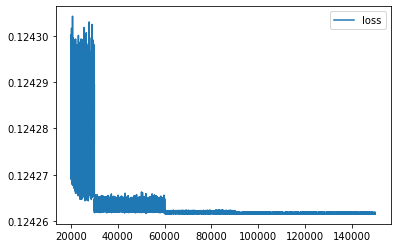

In [ ]:
loss_df[20000:].plot()

<AxesSubplot:>

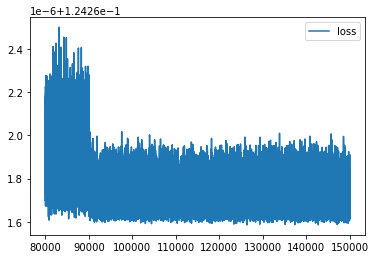

In [ ]:
loss_df[80000:].plot()

In [ ]:
(np.where(sigmoid(X.dot(w)) > .5, 1, 0) == y).mean()

0.97

#### 2) [모멘텀 기법](https://cs231n.github.io/neural-networks-3/) 사용하기
<참고> https://twinw.tistory.com/247
$$v(t+1) = m * v(t) - \alpha \cfrac {\partial \text{Loss}(w)}{\partial w} \\
w(t+1) = w(t) + v(t+1)$$

```
v(t+1) = m * v(t) - a * dW(t)
W(t+1) = W(t) + v(t+1)

v(0) = 0, m = 0.9
v(1) = - a * dW(0)
W(1) = W(0) + v(1) = W(0) - a * dW(0)

v(2) = m * v(1) - a * dW(1) = - 0.9 * a * dW(0) - a * dW(1)
W(2) = W(1) - a * [ 0.9 * dW(0) + dW(1) ]

v(3) = m * v(2) - a * dW(2) = - a * [ 0.9 * 0.9 * dW(0) + 0.9 * dW(1) + dW(2) ]
W(3) = W(2) + v(3) = W(2) - a * [ 0.9 * 0.9 * dW(0) + 0.9 * dW(1) + dW(2) ]
```
- a: learning rate
- m: momentum. memory of prior velocity. generally 0.9 ~ 0.99
- v: velocity. moving speed and direction.

```python
v = m * v - learning_rate * dW
W += v
```

In [ ]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(123)
w = rand(X.shape[-1]) - 0.5
w

array([ 0.19646919, -0.21386067, -0.27314855,  0.05131477,  0.21946897])

In [ ]:
EPOCH = 50000 # 50000
batch = 34
lrs = [0.0005, 0.00005, 0.00001]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = np.zeros(w.shape)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
    if epoch < 20000:
        lr = lrs[0]
    elif epoch < 40000:
        lr = lrs[1]
    else: lr = lrs[2]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        # 아래 사항은 구현하세요.
        yhat = sigmoid(x_batch.dot(w))
        epochLoss += - y_batch.T.dot(np.log(yhat + MIN)) \
                    - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        dw = x_batch.T.dot(yhat - y_batch)
        v = m*v - lr*dw
        w += v
    epochLoss /= rows
    losses.append(epochLoss)

$$v(t+1) = m * v(t) - \alpha \cfrac {\partial \text{Loss}(w)}{\partial w} \\
w(t+1) = w(t) + v(t+1)$$

In [ ]:
w

array([ 0.30364301, -1.04097375,  5.68894839, -0.27882388, -0.87984082])

In [ ]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

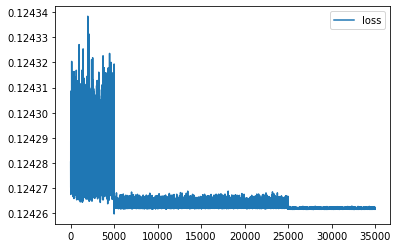

In [ ]:
lossdf = pd.DataFrame(losses[15000:], columns=["loss"])
lossdf.plot()

[Quiz] 정확도 계산하기

In [ ]:
(np.where(sigmoid(X.dot(w)) > .5, 1, 0) == y).mean()

0.97

#### 3) Nesterov 기법 사용하기
![](https://t1.daumcdn.net/cfile/tistory/996E494B5B0D03A003)

```python
v = m * v - learning_rate * d(w + m*v)
w += v
```

In [ ]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [ ]:
EPOCH = 50000 # 50000
batch = 34
lrs = [0.0005, 0.00005, 0.00001, 0.000005]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = 0

def sigma(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
    if epoch < 10000:
        lr = lrs[0]
    elif epoch < 20000:
        lr = lrs[1]
    elif epoch < 40000:
        lr = lrs[2]
    else: lr = lrs[3]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        y_hat_batch = sigma(x_batch.dot(w))         # = P(y=1)
        loss_batch = - y_batch.T.dot(np.log(y_hat_batch)) \
                     - (1 - y_batch).T.dot(np.log(1 - y_hat_batch))
        epochLoss += loss_batch
        # 아래 사항을 구현하세요.
        # dw = x_batch.T.dot(y_hat_batch - y_batch)
        y_hat_batch_withV = sigma(x_batch.dot(w + m*v))
        dw_withV = x_batch.T.dot(y_hat_batch_withV - y_batch)
        v = m*v - lr*dw_withV
        w += v
        
    epochLoss /= rows
    losses.append(epochLoss)

```
v = m * v - learning_rate * d(w + m*v)
w += v
```

In [ ]:
w

array([ 0.30364431, -1.04096383,  5.6889458 , -0.27881809, -0.87984588])

In [ ]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

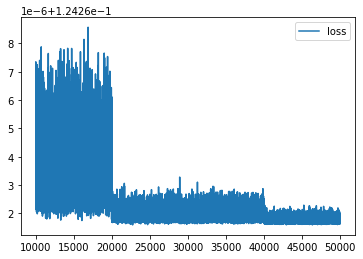

In [ ]:
lossdf = pd.DataFrame(losses, columns=["loss"])
lossdf[10000:].plot()

#### 4) RMSprop 사용하기
```python
v = m * v + (1 - m) * dw**2
w += - learning_rate * dw / (np.sqrt(v) + eps)
```

In [ ]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [ ]:
EPOCH = 50000 # 50000
batch = 34
# lrs = [0.0005, 0.00005, 0.00001, 0.000005]
lr = 0.0005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = np.zeros(w.shape)
eps=1e-10


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        y_hat_batch = sigmoid(x_batch.dot(w))
        # 아래 사항 구현하세요.
        dw = x_batch.T.dot(y_hat_batch - y_batch)
        v = m * v + (1 - m) * dw**2
        w += - lr * dw / (np.sqrt(v) + eps)
        
    epochLoss /= rows
    losses.append(epochLoss)

```python
v = m * v + (1 - m) * dw**2
w += - learning_rate * dw / (np.sqrt(v) + eps)
```

In [ ]:
w

array([ 0.30795988, -1.04916538,  5.71735805, -0.2813089 , -0.8835331 ])

In [ ]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

In [ ]:
probs = sigma(X.dot(w))
preds = np.where(probs > 0.5, 1, 0)
(y == preds).mean()

0.97

추가적으로 이외에도 다양한 optimizer:
- adam
- adadelta

주로 많이 사용하는 optimizer는 adam, nesterov, rmsprop 등을 많이 사용합니다.

추가적으로는 아래 자료를 참고하세요.
- https://velog.io/@goe87088/Optimizer-%EC%A0%95%EB%A6%AC
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [ ]:
!pip install cvxopt

In [ ]:
import numpy as np
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [ ]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
        P = cvxopt.matrix(np.outer(y, y) * K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0 
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        # Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
        # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        
    def project(self, X):
        return np.dot(X, self.w) + self.b
    
    
    def predict(self, X):
        return np.sign(self.project(X))

In [ ]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

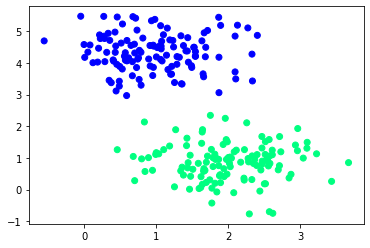

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  1e-15  9e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-15  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  1e-16  8e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-15  4e-15
Optimal solution found.


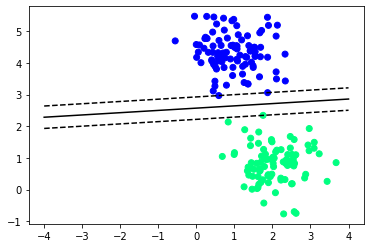

In [ ]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

In [ ]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]], dtype=int64)

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

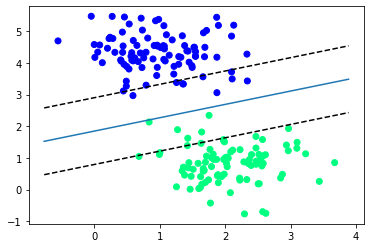

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [ ]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]], dtype=int64)

또다른 솔루션:

In [ ]:
def svm_function(x,y):
    #initilizing weight
    w = np.zeros(len(x[0]))
    #initialize learning rate
    l_rate = 1
    #epoch
    epoch = 100000
    #output list
    out = []
    #training svm
    for e in range(epoch):
        for i, val in enumerate(x):
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
            else:
                w = w + l_rate * (-2*(1/epoch)*w)
    
    for i, val in enumerate(x):
        out.append(np.dot(x[i], w))
    
    return w, out

In [ ]:
class SVM(EPOCH=1000, C= )

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from numpy.random import shuffle, rand


class SVM(BaseEstimator, ClassifierMixin):

    def __init__(self, epochs=1000, C=1., eps=1e-10, seed=234):
        self.epochs = epochs
        self.C = C
        self.eps = eps
        self.seed = seed
        np.random.seed(self.seed)

    def fit(self, X, y, lr=0.0005, batch=34, m=.95, w=None):

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        self.losses_ = []
        if w: self.w = rand(self.X_.shape[-1]) - 0.5
        else: self.w = w
        self.lr = lr
        self.m = .95
        self.yprime = np.where(self.y_, self.y_, -1)
        self.v = np.zeros(self.w.shape)
        rows = self.X_.shape[0]
        randRow = np.arange(rows)
        
        for epoch in range(self.epochs):
            shuffle(randRow)
            loss = 0

            for i in range(0, rows, batch):
                batch_index = randRow[i:i+batch]
                x_batch = self.X_[batch_index]
                y_batch = self.yprime[batch_index]
                yhat = x_batch.dot(self.w)
                slacks = 1 - y_batch*yhat
                slackIdx = slacks > 0
                loss += .5*self.w.T.dot(self.w) + C*slacks[slackIdx].sum()
                dw = self.w - C*(x_batch.T*slackIdx*y_batch).sum(axis=1)
                self.v = self.m * self.v + (1 - self.m) * dw**2
                self.w += - self.lr * self.dw / (np.sqrt(self.v) + self.eps)

            loss /= rows
            self.losses.append(loss)
        
        return self

    def predict(self, X):

        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        return np.where(X.dot(self.w)>0, 1, 0)
    
    def score(self, X, y):
        return (np.where(X.dot(w) > 0, 1, 0) == y).mean()